In [4]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

# Deep Learning

# RNN

In [23]:
df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [24]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [25]:
# split data
prediction_days = 30
df_train= Real_Price[:len(Real_Price)-prediction_days]
df_test= Real_Price[len(Real_Price)-prediction_days:]

In [26]:
# Data preprocess
training_set = df_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [27]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)
predictions = regressor.predict(X_test)




Epoch 1/100
669/669 [==============================] - 2s 2ms/step - loss: 0.0232
Epoch 2/100
669/669 [==============================] - 2s 2ms/step - loss: 0.0096
Epoch 3/100
669/669 [==============================] - 2s 2ms/step - loss: 0.0063
Epoch 4/100
669/669 [==============================] - 2s 2ms/step - loss: 0.0036
Epoch 5/100
669/669 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 6/100
669/669 [==============================] - 2s 2ms/step - loss: 5.4962e-04
Epoch 7/100
669/669 [==============================] - 2s 3ms/step - loss: 1.3743e-04
Epoch 8/100
669/669 [==============================] - 2s 3ms/step - loss: 4.8123e-05
Epoch 9/100
669/669 [==============================] - 3s 4ms/step - loss: 3.9420e-05
Epoch 10/100
669/669 [==============================] - 2s 2ms/step - loss: 3.8554e-05
Epoch 11/100
669/669 [==============================] - 2s 2ms/step - loss: 3.9318e-05
Epoch 12/100
669/669 [==============================] - 2s 2ms/step - lo

In [29]:
# Making the predictions
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)

1/1 [==============================] - 0s 132ms/step


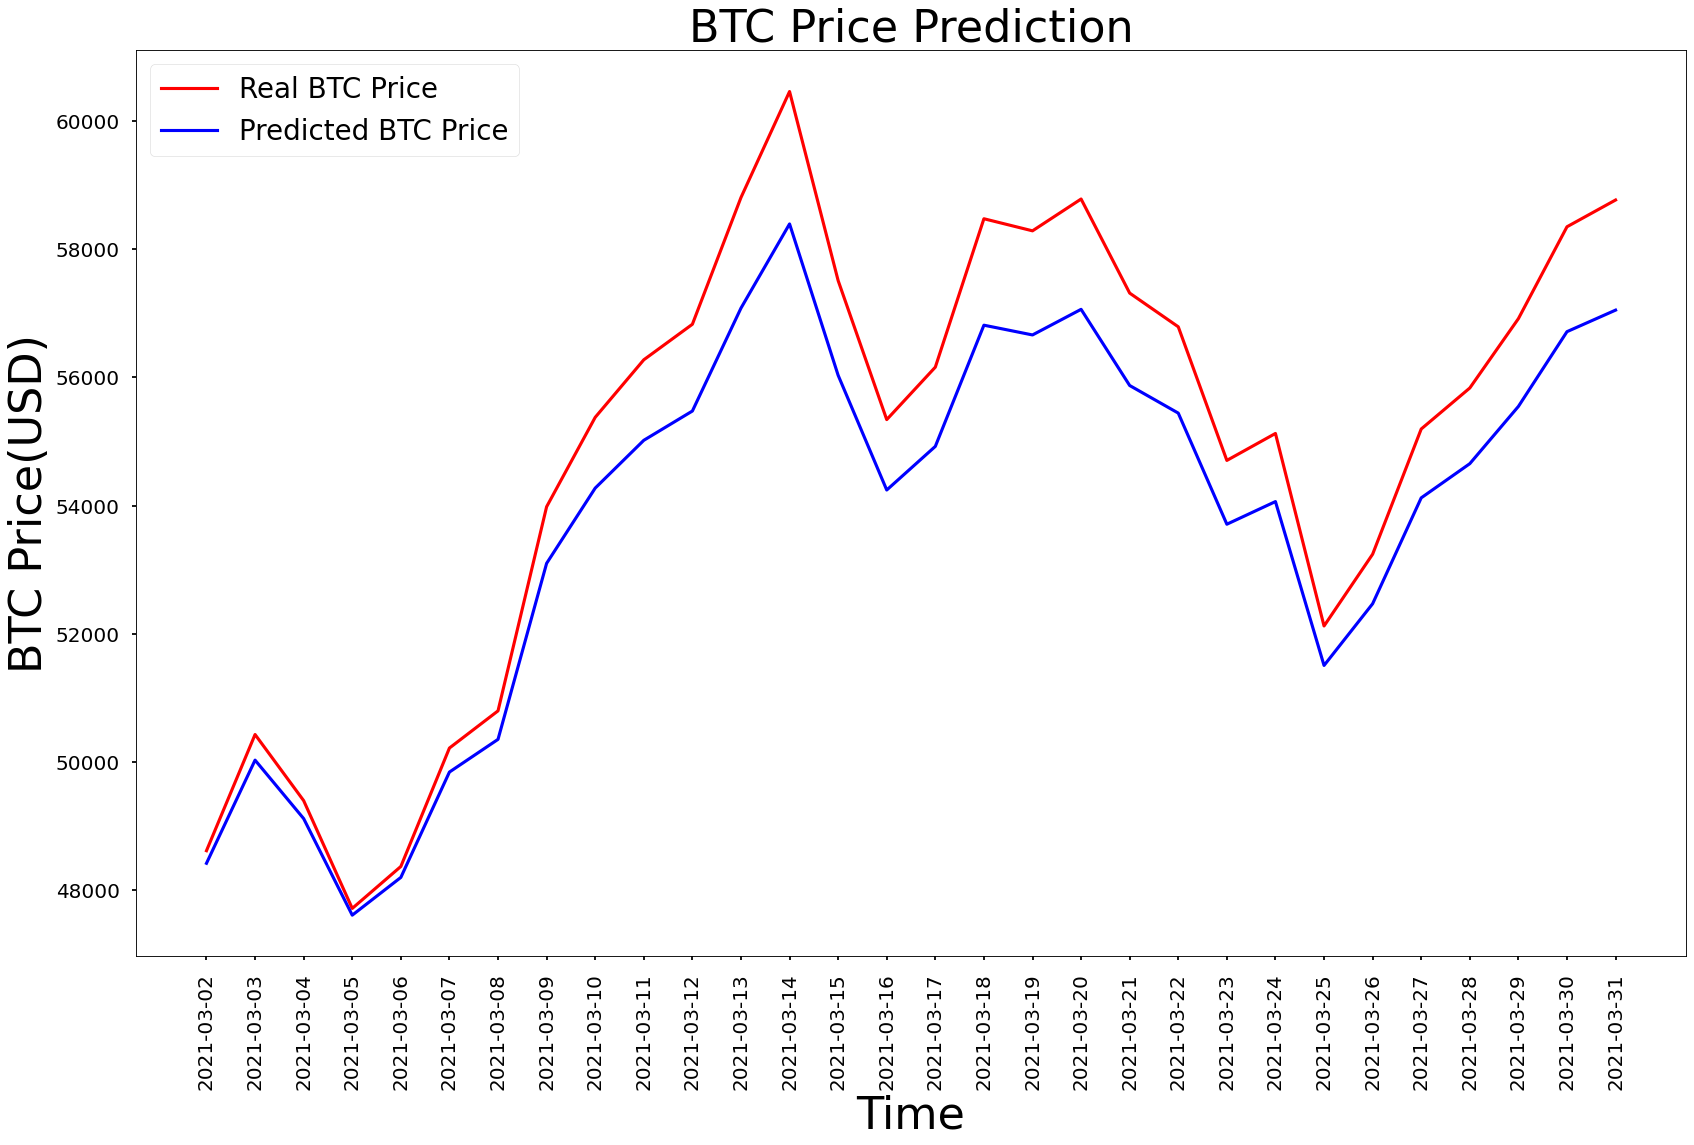

In [30]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_set, color = 'red', label = 'Real BTC Price')
plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test_set, predicted_BTC_price, squared=False)
rmse

1205.3124204686328

# ARIMA

In [71]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime

In [49]:
df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df.head()

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   
3  1325318100   NaN   NaN   NaN    NaN           NaN                NaN   
4  1325318160   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN  
3             NaN  
4             NaN

In [50]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

## Data visualization

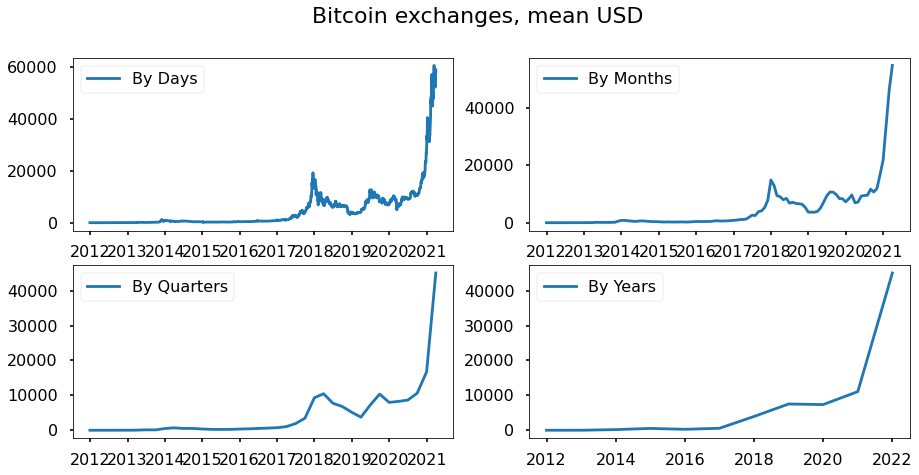

In [66]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

## Data transformation

In [52]:
# Box-Cox Transformations
df_month['Weighted_Price_box'], lmbda = stats.boxcox(df_month.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])


Dickey–Fuller test: p=0.998863


In [53]:
# Seasonal differentiation
df_month['prices_box_diff'] = df_month.Weighted_Price_box - df_month.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff[12:])[1])


Dickey–Fuller test: p=0.444282


Dickey–Fuller test: p=0.000024


<Figure size 1080x504 with 0 Axes>

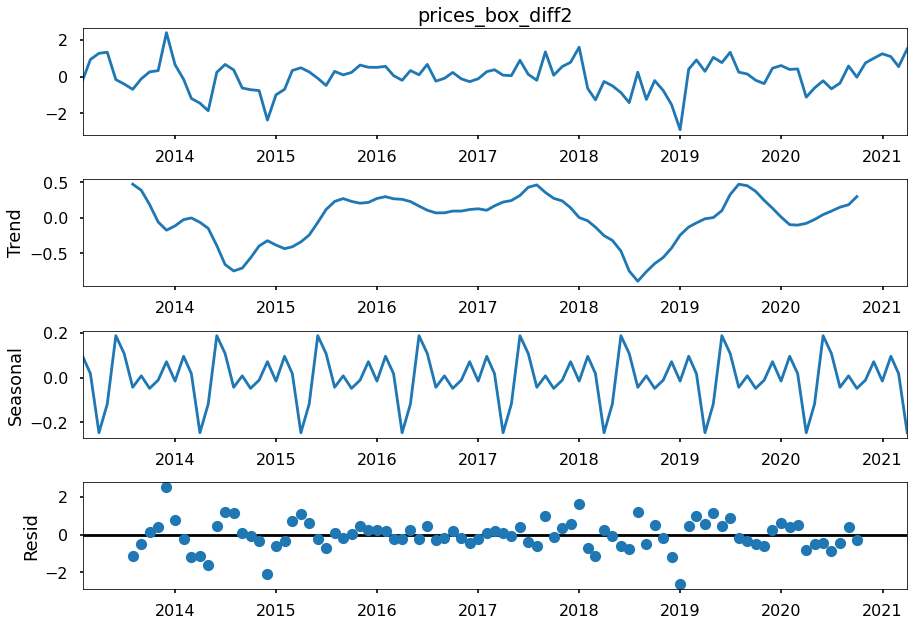

In [54]:
# Regular differentiation
df_month['prices_box_diff2'] = df_month.prices_box_diff - df_month.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_month.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_month.prices_box_diff2[13:])[1])

plt.show()

## ARIMA model parameter selection

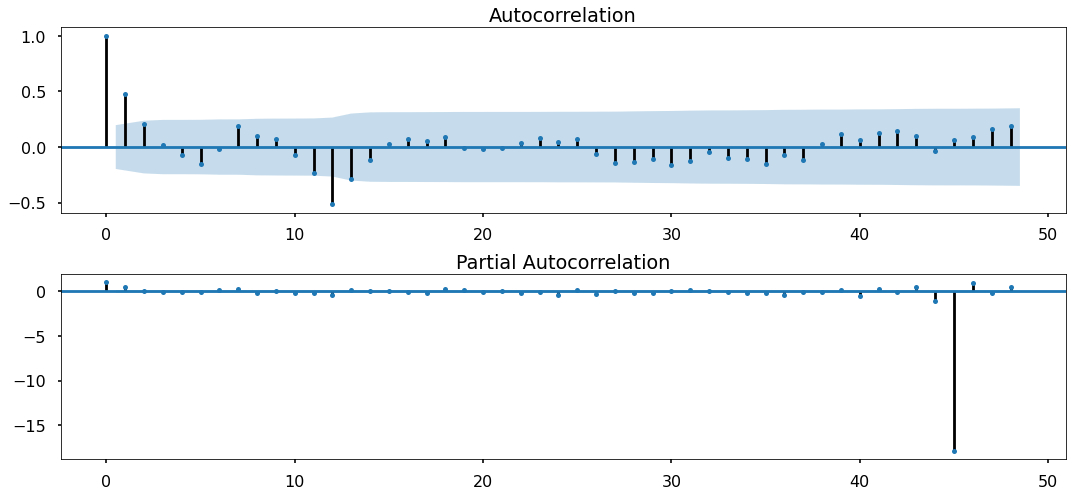

In [55]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df_month.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [56]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_month.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [67]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
19  (1, 0, 0, 1)  173.616142
21  (1, 0, 1, 1)  174.766368
25  (1, 1, 0, 1)  175.547900
37  (2, 0, 0, 1)  175.555024
7   (0, 1, 0, 1)  175.589445
                                      SARIMAX Results                                       
Dep. Variable:                   Weighted_Price_box   No. Observations:                  112
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -83.808
Date:                              Sun, 11 Dec 2022   AIC                            173.616
Time:                                      05:16:34   BIC                            181.402
Sample:                                  12-31-2011   HQIC                           176.766
                                       - 03-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---

Dickey–Fuller test:: p=0.000000


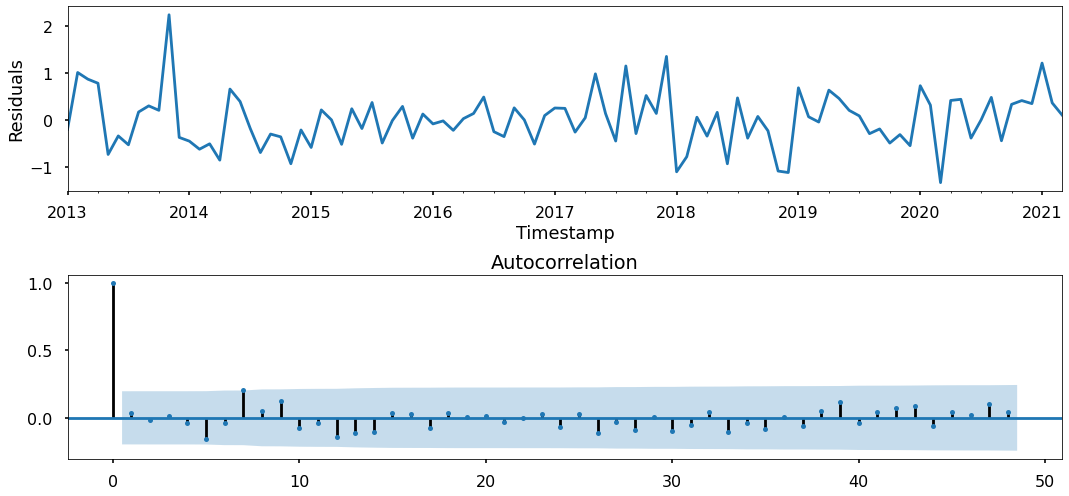

In [58]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

## ARIMA Model Forecasting Bitcoin Price

In [68]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))
    

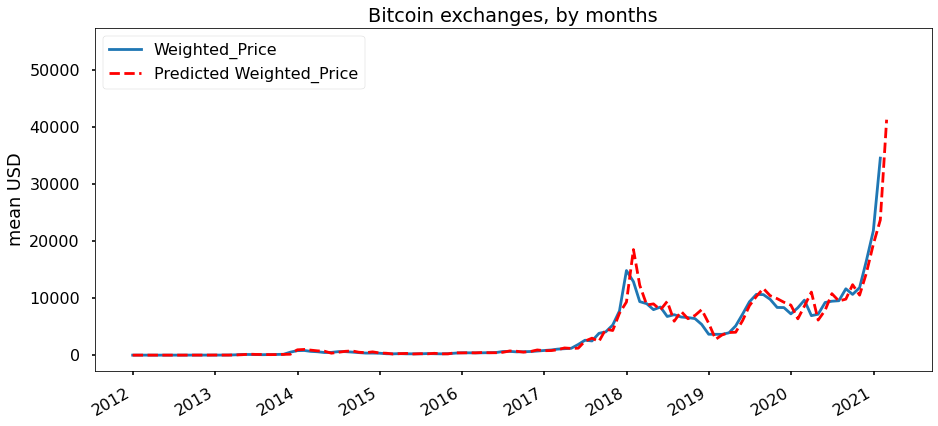

In [78]:
# Prediction
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2021, 1, 31), datetime(2021, 2, 28), datetime(2021, 3, 31)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=110), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

# ARIMA 

In [90]:
# import libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

In [91]:
df = pd.read_csv("bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")
df.head(3)

Timestamp  Open  High   Low  Close  Volume_(BTC)  Volume_(Currency)  \
0  1325317920  4.39  4.39  4.39   4.39      0.455581                2.0   
1  1325317980   NaN   NaN   NaN    NaN           NaN                NaN   
2  1325318040   NaN   NaN   NaN    NaN           NaN                NaN   

   Weighted_Price  
0            4.39  
1             NaN  
2             NaN

In [92]:
# Here I start cleaning the data. Firstly, converting Timestamp to datetime64
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
# sets the index as the date
df.index = df.Timestamp
# Resamples the data to the average daily value of each column. Removes excessive frequency
df = df.resample('D').mean()
# drops any missing values that are present
df = df.dropna()
df.head(3)

Open      High       Low     Close  Volume_(BTC)  \
Timestamp                                                          
2011-12-31  4.465000  4.482500  4.465000  4.482500     23.829470   
2012-01-01  4.806667  4.806667  4.806667  4.806667      7.200667   
2012-01-02  5.000000  5.000000  5.000000  5.000000     19.048000   

            Volume_(Currency)  Weighted_Price  
Timestamp                                      
2011-12-31         106.330084        4.471603  
2012-01-01          35.259720        4.806667  
2012-01-02          95.240000        5.000000

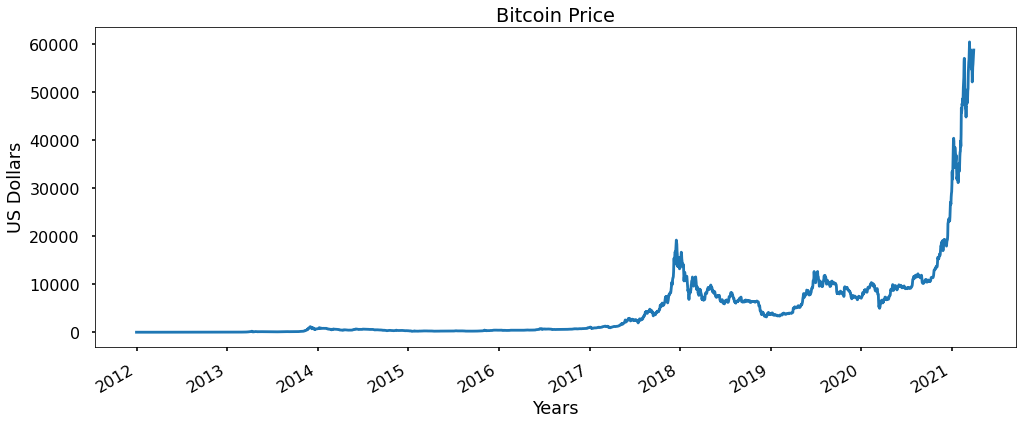

In [93]:
# graph bitcoin price over the years
df.Weighted_Price.plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()
# As the graph shows 2017-2021 price behavior looks signficantly different than 2012-2021

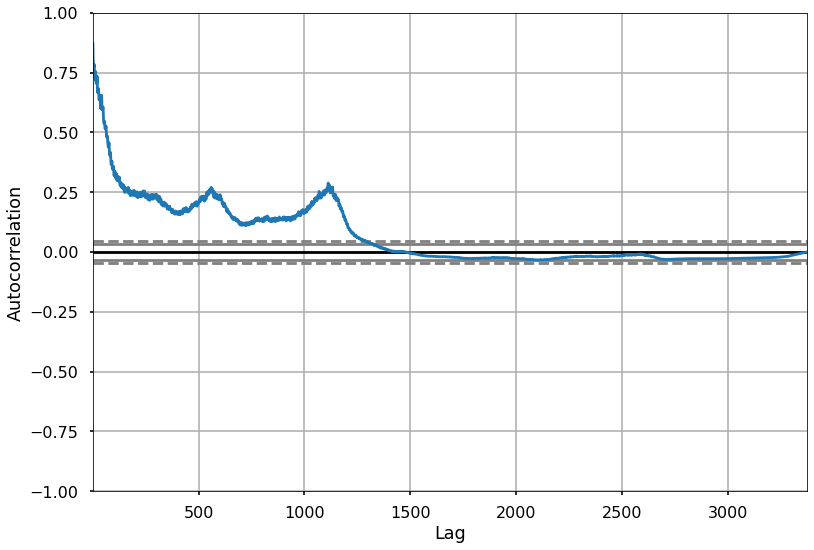

In [94]:
# Plot the autocorrelation to see if there are a large number of lags in the time series.
autocorrelation_plot(df)
plt.show()

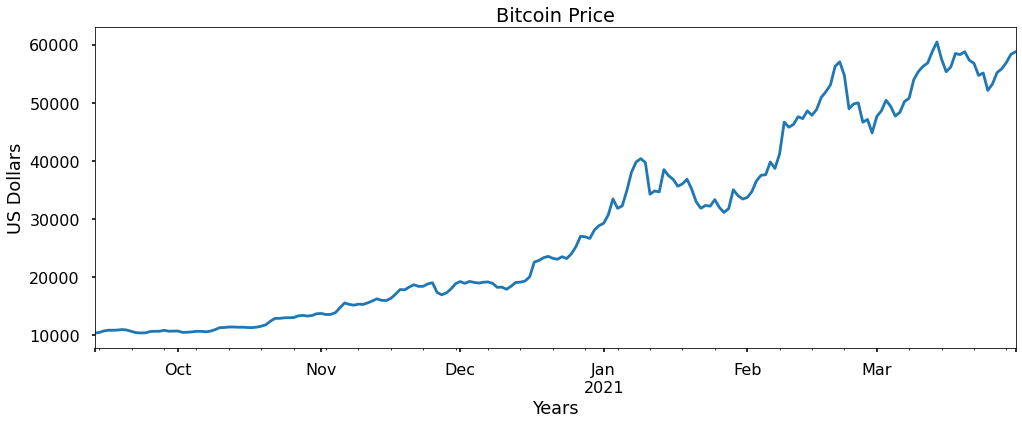

In [95]:
# let's look at the past 200 days to possibly adjust our data to this period
df.Weighted_Price.iloc[-200:].plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()

In [96]:
from statsmodels.tsa.arima_model import ARIMA
# We're going to create a dataframe for just the price (the index is still the date)
price = df.Weighted_Price
# Next we're going to assign 70% percent of the data to training and 30% for testing
X = price.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=6304.440232, expected=6135.543847
predicted=6071.842075, expected=6023.889667
predicted=6025.972695, expected=6202.876879
predicted=6233.053846, expected=6201.552619
predicted=6215.232868, expected=6095.577403
predicted=6063.459026, expected=6081.380557
predicted=6085.995336, expected=5903.335065
predicted=5876.637459, expected=6363.429736
predicted=6439.873893, expected=6349.980905
predicted=6382.775695, expected=6452.834154
predicted=6432.269973, expected=6596.638644
predicted=6652.318826, expected=6570.766853
predicted=6560.327656, expected=6581.029785
predicted=6578.127054, expected=6541.718841
predicted=6543.613086, expected=6573.830823
predicted=6576.687520, expected=6738.872118
predicted=6776.515139, expected=6705.525899
predicted=6704.579255, expected=6480.199576
predicted=6429.443525, expected=6354.062268
predicted=6332.434388, expected=6218.799425
predicted=6203.561619, expected=6236.444559
predicted=6236.518413, expected=6235.684071
predicted=6245.860081, expected=

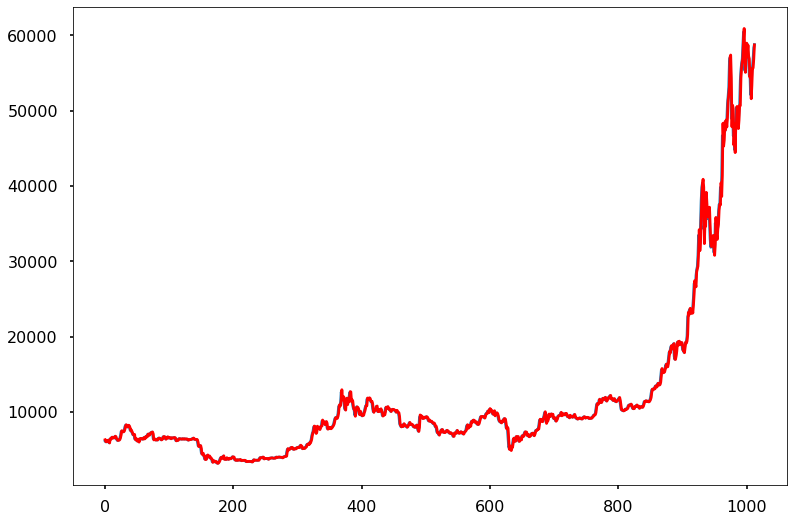

In [97]:
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 626.264


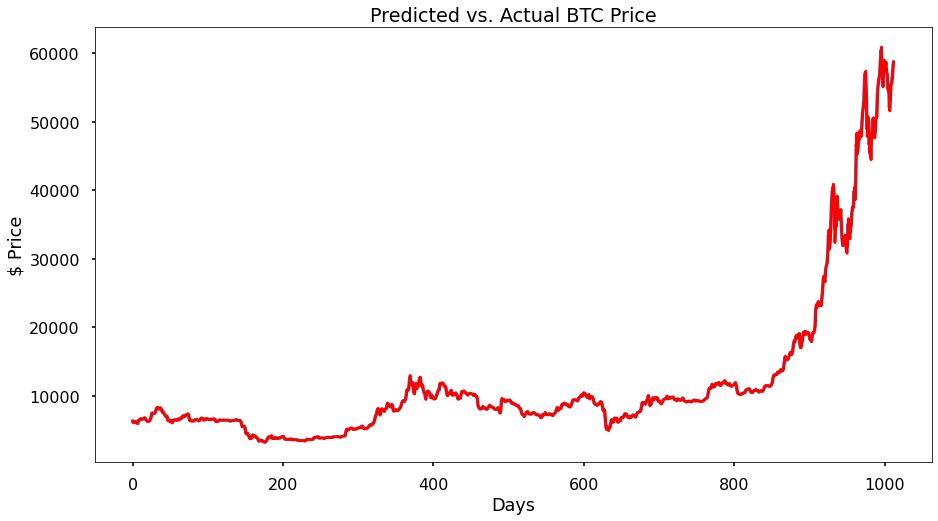

In [98]:
# if we look at this model, the predicted is indistinuishable from the actual price
# this is simply because it's predicting day by day.
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Actual BTC Price')
plt.show()

Test RMSE: 626.264


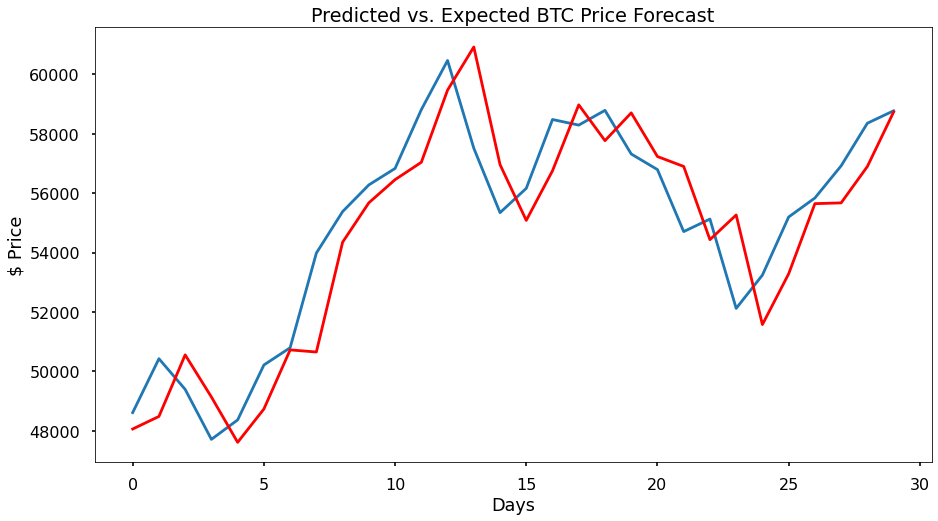

In [99]:
# I plot 30 days to more accurately see how the models works with its lag
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test[-30:])
plt.plot(predictions[-30:], color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Expected BTC Price Forecast')
plt.show()

# Machine Learning

#  RANDOM FOREST 

In [33]:
# Import Libraries
import numpy as np  # to handle matrix
import pandas as pd # to handle data
from matplotlib import pyplot as plt # to visualize
import datetime, pytz # to handle time
from sklearn.model_selection import train_test_split # Split data
from sklearn.ensemble import RandomForestRegressor # Random Forest Classifier


In [34]:
# Define a conversion function for the native timestamps in the csv file
def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))


In [35]:
# Import the dataset and encode the date
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',parse_dates=[0], date_parser=dateparse)
df.tail(3)


Timestamp      Open      High       Low     Close  \
4857374 2021-03-30 23:58:00+00:00  58693.43  58723.84  58693.43  58723.84   
4857375 2021-03-30 23:59:00+00:00  58742.18  58770.38  58742.18  58760.59   
4857376 2021-03-31 00:00:00+00:00  58767.75  58778.18  58755.97  58778.18   

         Volume_(BTC)  Volume_(Currency)  Weighted_Price  
4857374      1.705682      100117.070370    58696.198496  
4857375      0.720415       42332.958633    58761.866202  
4857376      2.712831      159417.751000    58764.349363

In [5]:
df.corr()

Open      High       Low     Close  Volume_(BTC)  \
Open               1.000000  0.999999  0.999999  0.999999     -0.051860   
High               0.999999  1.000000  0.999998  0.999999     -0.051717   
Low                0.999999  0.999998  1.000000  0.999999     -0.052040   
Close              0.999999  0.999999  0.999999  1.000000     -0.051877   
Volume_(BTC)      -0.051860 -0.051717 -0.052040 -0.051877      1.000000   
Volume_(Currency)  0.344074  0.344498  0.343541  0.344036      0.352038   
Weighted_Price     0.999999  0.999999  1.000000  1.000000     -0.051887   

                   Volume_(Currency)  Weighted_Price  
Open                        0.344074        0.999999  
High                        0.344498        0.999999  
Low                         0.343541        1.000000  
Close                       0.344036        1.000000  
Volume_(BTC)                0.352038       -0.051887  
Volume_(Currency)           1.000000        0.344010  
Weighted_Price              0.344010        1.000000

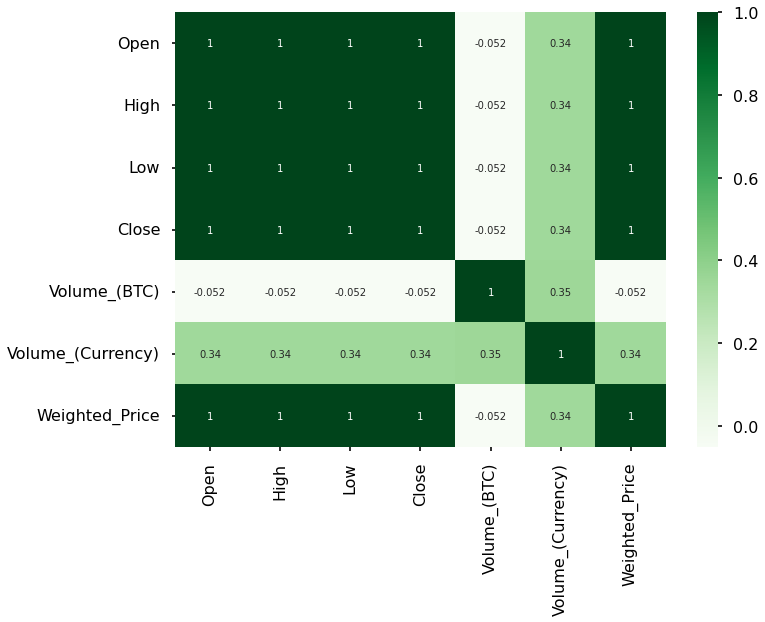

In [ ]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [36]:
# First thing is to fix the data for bars/candles where there are no trades. 
# Volume/trades are a single event so fill "NaN"s with zeroes for relevant fields...
df['Volume_(BTC)'].fillna(value=0, inplace=True)
df['Volume_(Currency)'].fillna(value=0, inplace=True)
df['Weighted_Price'].fillna(value=0, inplace=True)

# Secondly, we need to fix the OHLC (open, high, low, close) data which is a continuous timeseries so
# let's fill forwards those values.
df['Open'].fillna(method='ffill', inplace=True)
df['High'].fillna(method='ffill', inplace=True)
df['Low'].fillna(method='ffill', inplace=True)
df['Close'].fillna(method='ffill', inplace=True)
df.tail(3)

Timestamp      Open      High       Low     Close  \
4857374 2021-03-30 23:58:00+00:00  58693.43  58723.84  58693.43  58723.84   
4857375 2021-03-30 23:59:00+00:00  58742.18  58770.38  58742.18  58760.59   
4857376 2021-03-31 00:00:00+00:00  58767.75  58778.18  58755.97  58778.18   

         Volume_(BTC)  Volume_(Currency)  Weighted_Price  
4857374      1.705682      100117.070370    58696.198496  
4857375      0.720415       42332.958633    58761.866202  
4857376      2.712831      159417.751000    58764.349363

In [37]:
# Indicate the 'start' and 'end' time. [To beginning to the end. (END can be change according to today's date)]
import datetime
start = datetime.datetime(2012, 1, 1, 0, 0, 0, 0, pytz.UTC)
end = datetime.datetime(2021, 3, 31, 20, 0, 0, 0, pytz.UTC)

# find rows between start and end time and find the first row (00:00 monday morning)
# Grouping by day
daily_df = df[(df['Timestamp'] >= start) & (df['Timestamp'] <= end)].groupby([pd.Grouper(key='Timestamp', freq='D')]).first().reset_index()
daily_df = daily_df.set_index('Timestamp')
daily_df.tail(3)

Open      High       Low     Close  \
Timestamp                                                           
2021-03-29 00:00:00+00:00  55790.28  55822.98  55777.98  55804.36   
2021-03-30 00:00:00+00:00  57623.66  57670.58  57604.30  57670.58   
2021-03-31 00:00:00+00:00  58767.75  58778.18  58755.97  58778.18   

                           Volume_(BTC)  Volume_(Currency)  Weighted_Price  
Timestamp                                                                   
2021-03-29 00:00:00+00:00      1.731449       96636.546983    55812.518695  
2021-03-30 00:00:00+00:00      4.961638      285963.732560    57634.946721  
2021-03-31 00:00:00+00:00      2.712831      159417.751000    58764.349363

In [38]:
# Again fill NaN
daily_df['Volume_(BTC)'].fillna(value=0, inplace=True)
daily_df['Volume_(Currency)'].fillna(value=0, inplace=True)
daily_df['Weighted_Price'].fillna(value=0, inplace=True)

daily_df['Open'].fillna(method='ffill', inplace=True)
daily_df['High'].fillna(method='ffill', inplace=True)
daily_df['Low'].fillna(method='ffill', inplace=True)
daily_df['Close'].fillna(method='ffill', inplace=True)

print("Shape: ", daily_df.shape)
print("Columns= ", daily_df.columns)
print("Is There any 'NaN' value: ", daily_df.isnull().values.any())
print("Is there any duplicate value: ", daily_df.index.duplicated().any())
daily_df.tail(3)

Shape:  (3378, 7)
Columns=  Index(['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)',
       'Weighted_Price'],
      dtype='object')
Is There any 'NaN' value:  False
Is there any duplicate value:  False


Open      High       Low     Close  \
Timestamp                                                           
2021-03-29 00:00:00+00:00  55790.28  55822.98  55777.98  55804.36   
2021-03-30 00:00:00+00:00  57623.66  57670.58  57604.30  57670.58   
2021-03-31 00:00:00+00:00  58767.75  58778.18  58755.97  58778.18   

                           Volume_(BTC)  Volume_(Currency)  Weighted_Price  
Timestamp                                                                   
2021-03-29 00:00:00+00:00      1.731449       96636.546983    55812.518695  
2021-03-30 00:00:00+00:00      4.961638      285963.732560    57634.946721  
2021-03-31 00:00:00+00:00      2.712831      159417.751000    58764.349363

In [39]:
historical_df = daily_df
for i in range(1,8): # for 7 days
    historical_df["Open_b_"+str(i)] = daily_df['Open'].shift(i)
    historical_df["High_b_"+str(i)] = daily_df['High'].shift(i)
    historical_df["Low_b_"+str(i)]  = daily_df['Low'].shift(i)
    historical_df["Close_b_"+str(i)]= daily_df['Close'].shift(i)
    historical_df["Volume_(BTC)_b_"+str(i)]      = daily_df['Volume_(BTC)'].shift(i)
    historical_df["Volume_(Currency)_b_"+str(i)] = daily_df['Volume_(Currency)'].shift(i)

historical_df = historical_df.dropna() # drop the first rows. They don't have previous information 
print("Historical Data Shape: ", historical_df.shape)
historical_df.tail(3)


Historical Data Shape:  (3371, 49)


Open      High       Low     Close  \
Timestamp                                                           
2021-03-29 00:00:00+00:00  55790.28  55822.98  55777.98  55804.36   
2021-03-30 00:00:00+00:00  57623.66  57670.58  57604.30  57670.58   
2021-03-31 00:00:00+00:00  58767.75  58778.18  58755.97  58778.18   

                           Volume_(BTC)  Volume_(Currency)  Weighted_Price  \
Timestamp                                                                    
2021-03-29 00:00:00+00:00      1.731449       96636.546983    55812.518695   
2021-03-30 00:00:00+00:00      4.961638      285963.732560    57634.946721   
2021-03-31 00:00:00+00:00      2.712831      159417.751000    58764.349363   

                           Open_b_1  High_b_1   Low_b_1  ...   Low_b_6  \
Timestamp                                                ...             
2021-03-29 00:00:00+00:00  55817.85  55920.82  55807.12  ...  54074.56   
2021-03-30 00:00:00+00:00  55790.28  55822.98  55777.98  ...  54218.57   
2021-03-31 00:00:00+00:00  57623.66  57670.58  57604.30  ...  52226.20   

                           Close_b_6  Volume_(BTC)_b_6  Volume_(Currency)_b_6  \
Timestamp                                                                       
2021-03-29 00:00:00+00:00   54262.78          3.443271           186510.68924   
2021-03-30 00:00:00+00:00   54233.85          8.171792           443399.68105   
2021-03-31 00:00:00+00:00   52349.40         14.822204           774792.60310   

                           Open_b_7  High_b_7   Low_b_7  Close_b_7  \
Timestamp                                                            
2021-03-29 00:00:00+00:00  57410.54  57467.10  57410.54   57425.64   
2021-03-30 00:00:00+00:00  54117.71  54262.78  54074.56   54262.78   
2021-03-31 00:00:00+00:00  54360.07  54361.57  54218.57   54233.85   

                           Volume_(BTC)_b_7  Volume_(Currency)_b_7  
Timestamp                                                           
2021-03-29 00:00:00+00:00          0.047341            2718.823515  
2021-03-30 00:00:00+00:00          3.443271          186510.689240  
2021-03-31 00:00:00+00:00          8.171792          443399.681050  

[3 rows x 49 columns]

In [40]:
# Add Label
historical_df["NEXT_CLOSE"] = historical_df['Close'].shift(-1) # Add next data as a label for current data
historical_df = historical_df.dropna() # drop the last row. It doesn't have next information 
print("after adding next CLOSE Label, new shape:", historical_df.shape)
historical_df.tail(3)

after adding next CLOSE Label, new shape: (3370, 50)


Open      High       Low     Close  \
Timestamp                                                           
2021-03-28 00:00:00+00:00  55817.85  55920.82  55807.12  55920.82   
2021-03-29 00:00:00+00:00  55790.28  55822.98  55777.98  55804.36   
2021-03-30 00:00:00+00:00  57623.66  57670.58  57604.30  57670.58   

                           Volume_(BTC)  Volume_(Currency)  Weighted_Price  \
Timestamp                                                                    
2021-03-28 00:00:00+00:00      0.770004       43011.953916    55859.414172   
2021-03-29 00:00:00+00:00      1.731449       96636.546983    55812.518695   
2021-03-30 00:00:00+00:00      4.961638      285963.732560    57634.946721   

                           Open_b_1  High_b_1   Low_b_1  ...  Close_b_6  \
Timestamp                                                ...              
2021-03-28 00:00:00+00:00  55081.26  55300.00  55081.26  ...   57425.64   
2021-03-29 00:00:00+00:00  55817.85  55920.82  55807.12  ...   54262.78   
2021-03-30 00:00:00+00:00  55790.28  55822.98  55777.98  ...   54233.85   

                           Volume_(BTC)_b_6  Volume_(Currency)_b_6  Open_b_7  \
Timestamp                                                                      
2021-03-28 00:00:00+00:00          0.047341            2718.823515  58072.87   
2021-03-29 00:00:00+00:00          3.443271          186510.689240  57410.54   
2021-03-30 00:00:00+00:00          8.171792          443399.681050  54117.71   

                           High_b_7   Low_b_7  Close_b_7  Volume_(BTC)_b_7  \
Timestamp                                                                    
2021-03-28 00:00:00+00:00  58079.56  58034.54   58038.65          1.404648   
2021-03-29 00:00:00+00:00  57467.10  57410.54   57425.64          0.047341   
2021-03-30 00:00:00+00:00  54262.78  54074.56   54262.78          3.443271   

                           Volume_(Currency)_b_7  NEXT_CLOSE  
Timestamp                                                     
2021-03-28 00:00:00+00:00           81537.409355    55804.36  
2021-03-29 00:00:00+00:00            2718.823515    57670.58  
2021-03-30 00:00:00+00:00          186510.689240    58778.18  

[3 rows x 50 columns]

In [45]:
# split data
prediction_days = 30
df_train = historical_df[:len(historical_df) - prediction_days ]
df_test  = historical_df[ len(historical_df) - prediction_days:]

print("PERCENT test/total data = %", (prediction_days/len(historical_df)) * 100)
print("train data shape:", df_train.shape)
print("test data shape:", df_test.shape)

training_set = df_train.values
X_train = training_set[0:len(training_set), 0:49]
y_train = training_set[0:len(training_set), 49].reshape(-1,1)

test_set = df_test.values
X_test = test_set[0:len(test_set), 0:49]
y_test = test_set[0:len(test_set), 49].reshape(-1,1)

df_train.head(3)

PERCENT test/total data = % 0.8902077151335311
train data shape: (3340, 50)
test data shape: (30, 50)


Open  High  Low  Close  Volume_(BTC)  \
Timestamp                                                         
2012-01-08 00:00:00+00:00   6.8   6.8  6.8    6.8           0.0   
2012-01-09 00:00:00+00:00   7.0   7.0  7.0    7.0           0.0   
2012-01-10 00:00:00+00:00   6.3   6.3  6.3    6.3           0.0   

                           Volume_(Currency)  Weighted_Price  Open_b_1  \
Timestamp                                                                
2012-01-08 00:00:00+00:00                0.0             0.0       6.0   
2012-01-09 00:00:00+00:00                0.0             0.0       6.8   
2012-01-10 00:00:00+00:00                0.0             0.0       7.0   

                           High_b_1  Low_b_1  ...  Close_b_6  \
Timestamp                                     ...              
2012-01-08 00:00:00+00:00       6.0      6.0  ...       5.00   
2012-01-09 00:00:00+00:00       6.8      6.8  ...       5.00   
2012-01-10 00:00:00+00:00       7.0      7.0  ...       5.29   

                           Volume_(BTC)_b_6  Volume_(Currency)_b_6  Open_b_7  \
Timestamp                                                                      
2012-01-08 00:00:00+00:00               0.0                    0.0      4.58   
2012-01-09 00:00:00+00:00               0.0                    0.0      5.00   
2012-01-10 00:00:00+00:00               0.0                    0.0      5.00   

                           High_b_7  Low_b_7  Close_b_7  Volume_(BTC)_b_7  \
Timestamp                                                                   
2012-01-08 00:00:00+00:00      4.58     4.58       4.58               0.0   
2012-01-09 00:00:00+00:00      5.00     5.00       5.00               0.0   
2012-01-10 00:00:00+00:00      5.00     5.00       5.00               0.0   

                           Volume_(Currency)_b_7  NEXT_CLOSE  
Timestamp                                                     
2012-01-08 00:00:00+00:00                    0.0        7.00  
2012-01-09 00:00:00+00:00                    0.0        6.30  
2012-01-10 00:00:00+00:00                    0.0        7.14  

[3 rows x 50 columns]

In [46]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 5)
rf.fit(X_train, np.ravel(y_train));
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = np.sqrt(np.mean(np.square(predictions.reshape(-1,1) - y_test.reshape(-1,1) )))
# Print out the root mean square error (rmse)
print('RMSE:', errors)
print('R^2 Score - Coefficient of Determination', rf.score(X_test, y_test))



RMSE: 3684.1145243673905
R^2 Score - Coefficient of Determination -0.012942314788680465


In [47]:
df_Result = pd.DataFrame(y_test, index=df_test.index, columns=["NEXT_CLOSE"])
df_Result['Predicted'] = predictions
df_Result = df_Result.sort_values('Timestamp')
df_Result.head(3)


NEXT_CLOSE    Predicted
Timestamp                                         
2021-03-01 00:00:00+00:00    49657.53  47261.46540
2021-03-02 00:00:00+00:00    48373.81  49740.88777
2021-03-03 00:00:00+00:00    50176.31  48546.15935

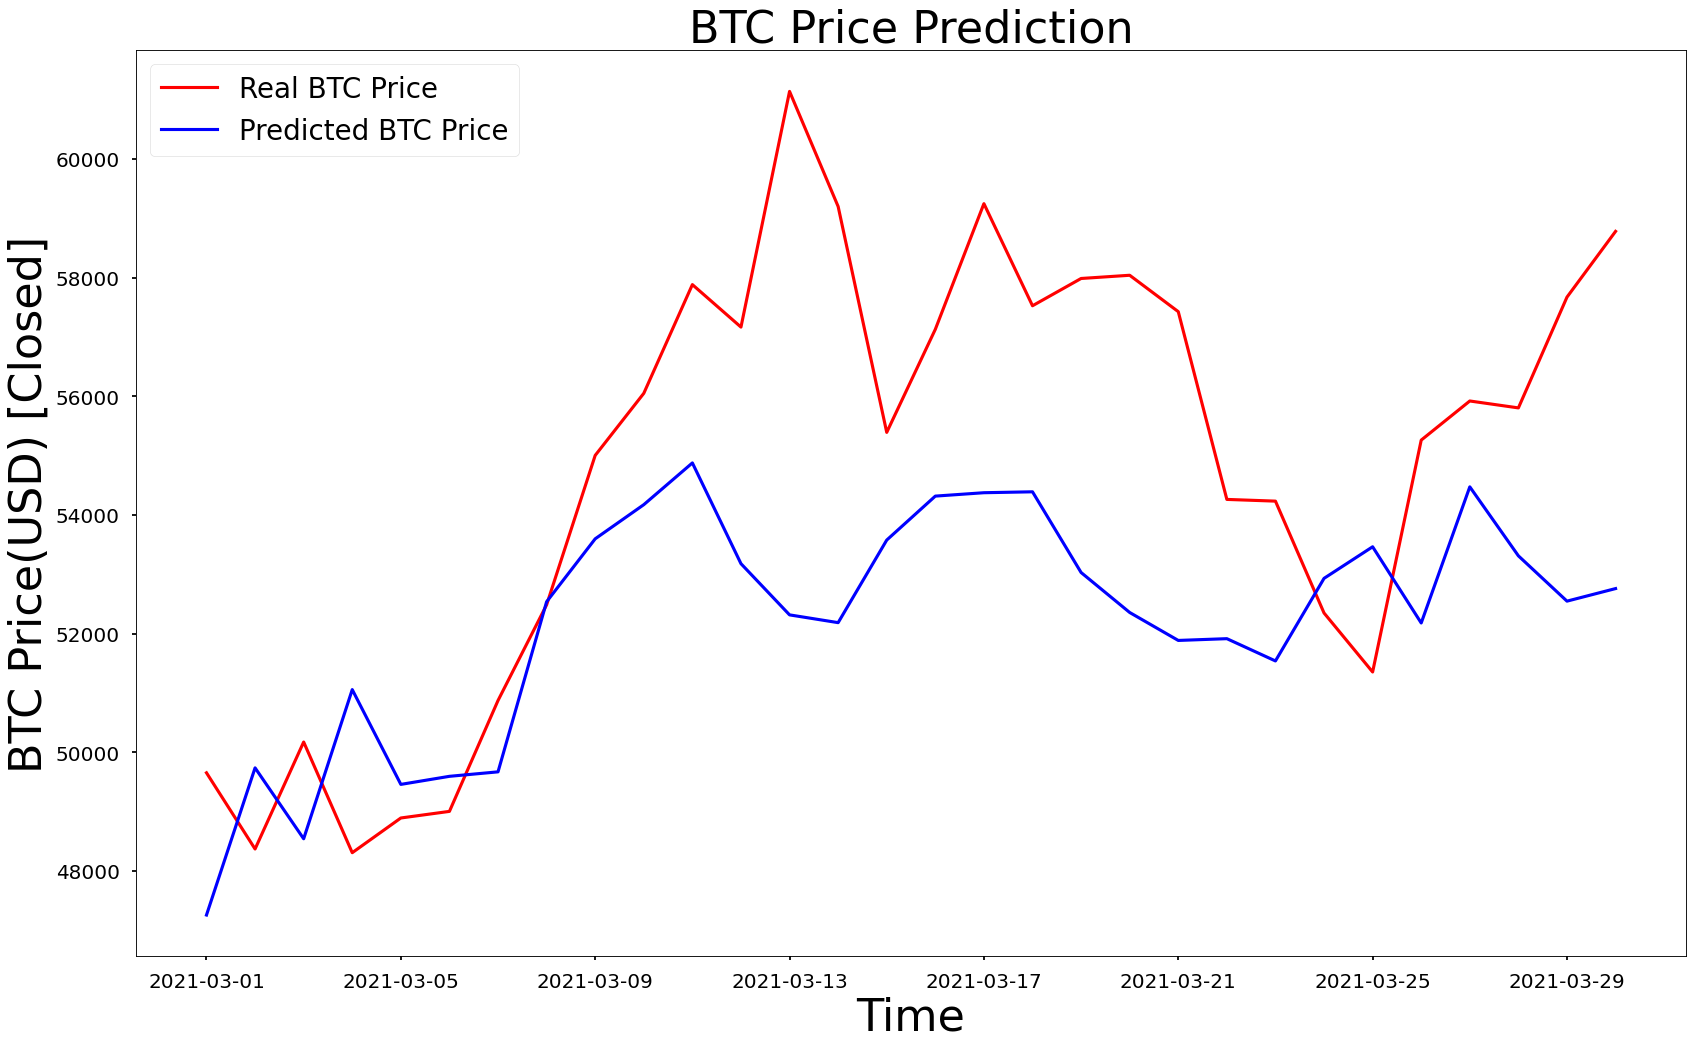

In [48]:
# Visualising the results
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(df_Result['NEXT_CLOSE'], color = 'red', label = 'Real BTC Price')
plt.plot(df_Result['Predicted'], color = 'blue', label = 'Predicted BTC Price')
plt.title('BTC Price Prediction', fontsize=40)
df_test = df_Result.reset_index()
x = df_test.index
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD) [Closed]', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()
